# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.042062e+01     7.392908e+00
 * time: 0.00156402587890625
     1     2.856655e+01     5.213986e+00
 * time: 0.006987810134887695
     2     1.902276e+01     3.988140e+00
 * time: 0.0140228271484375
     3     1.369065e+01     2.911403e+00
 * time: 0.021203994750976562
     4     1.224544e+01     3.687589e+00
 * time: 0.026036977767944336
     5     1.198284e+01     2.556933e+00
 * time: 0.03055286407470703
     6     1.017807e+01     1.778913e+00
 * time: 0.03430485725402832
     7     9.009287e+00     1.407935e+00
 * time: 0.038751840591430664
     8     8.677287e+00     9.896036e-01
 * time: 0.043048858642578125
     9     8.506883e+00     9.848446e-01
 * time: 0.04737281799316406
    10     8.468031e+00     1.216143e+00
 * time: 0.051666975021362305
    11     8.295606e+00     7.236890e-01
 * time: 0.0576930046081543
    12     8.186331e+00     7.143714e-01
 * time: 0.06340789794921875
    13     8.082898e+00     7.807023e-01
 * t

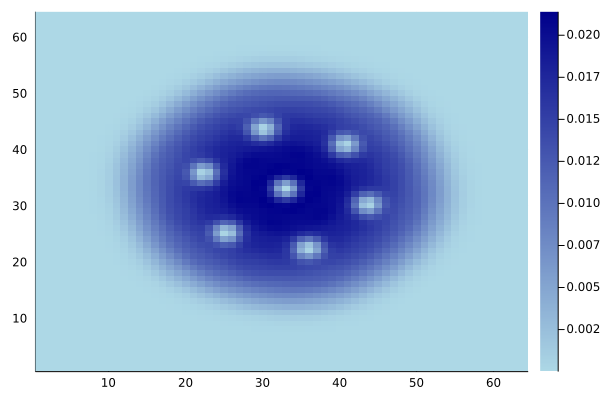

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)